In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid_india = pd.read_csv('C:/Users/anvit/OneDrive/Documents/2nd sem docs/Scripting/FinalProject/covid_19_india.csv', sep=",")
covid_india_vaccine = pd.read_csv('C:/Users/anvit/OneDrive/Documents/2nd sem docs/Scripting/FinalProject/covid_vaccine_india.csv', sep=",")
tests_india = pd.read_csv('C:/Users/anvit/OneDrive/Documents/2nd sem docs/Scripting/FinalProject/tests_india.csv', sep=",")
covid_us_states = pd.read_csv('C:/Users/anvit/OneDrive/Documents/2nd sem docs/Scripting/FinalProject/us_states_covid19.csv', sep=",")
covid_us_counties = pd.read_csv('C:/Users/anvit/OneDrive/Documents/2nd sem docs/Scripting/FinalProject/us_counties_covid19.csv', sep=",")
covid_usagg = pd.read_csv('C:/Users/anvit/OneDrive/Documents/2nd sem docs/Scripting/FinalProject/us_covid19_dailyagg.csv', sep=",")
covid_world = pd.read_csv('C:/Users/anvit/OneDrive/Documents/2nd sem docs/Scripting/FinalProject/covid_worldwide.csv', sep=",")

In [13]:
tests_india.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [14]:
tests_india.info()
print(tests_india.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16336 entries, 0 to 16335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16336 non-null  object 
 1   State         16336 non-null  object 
 2   TotalSamples  16336 non-null  float64
 3   Negative      6969 non-null   object 
 4   Positive      5662 non-null   float64
dtypes: float64(2), object(3)
memory usage: 638.2+ KB
Date                0
State               0
TotalSamples        0
Negative         9367
Positive        10674
dtype: int64


In [15]:
# Replace NaN values in the Negative column with 0
tests_india["Negative"] = tests_india["Negative"].fillna(0)
tests_india["Positive"] = tests_india["Positive"].fillna(0)
print(tests_india.isnull().sum())


Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64


In [16]:
covid_us_states.head()
print(covid_us_states.isnull().sum())

date                               0
state                              0
positive                         152
probableCases                  10184
negative                         310
pending                        13949
totalTestResultsSource             0
totalTestResults                  35
hospitalizedCurrently           3117
hospitalizedCumulative          6199
inIcuCurrently                  7920
inIcuCumulative                12933
onVentilatorCurrently           9422
onVentilatorCumulative         14704
recovered                       4522
dataQualityGrade                1261
lastUpdateEt                     487
dateModified                     487
checkTimeEt                      487
death                            826
hospitalized                    6199
dateChecked                      487
totalTestsViral                 5812
positiveTestsViral             10621
negativeTestsViral             12318
positiveCasesViral              3516
deathConfirmed                  8783
d

In [18]:
covid_us_states["negative"] = covid_us_states["negative"].fillna(0)
covid_us_states["positive"] = covid_us_states["positive"].fillna(0)
print(covid_us_states.isnull().sum())

date                               0
state                              0
positive                           0
probableCases                  10184
negative                           0
pending                        13949
totalTestResultsSource             0
totalTestResults                  35
hospitalizedCurrently           3117
hospitalizedCumulative          6199
inIcuCurrently                  7920
inIcuCumulative                12933
onVentilatorCurrently           9422
onVentilatorCumulative         14704
recovered                       4522
dataQualityGrade                1261
lastUpdateEt                     487
dateModified                     487
checkTimeEt                      487
death                            826
hospitalized                    6199
dateChecked                      487
totalTestsViral                 5812
positiveTestsViral             10621
negativeTestsViral             12318
positiveCasesViral              3516
deathConfirmed                  8783
d

In [20]:
covid_us_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15633 entries, 0 to 15632
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         15633 non-null  int64  
 1   state                        15633 non-null  object 
 2   positive                     15633 non-null  float64
 3   probableCases                5449 non-null   float64
 4   negative                     15633 non-null  float64
 5   pending                      1684 non-null   float64
 6   totalTestResultsSource       15633 non-null  object 
 7   totalTestResults             15598 non-null  float64
 8   hospitalizedCurrently        12516 non-null  float64
 9   hospitalizedCumulative       9434 non-null   float64
 10  inIcuCurrently               7713 non-null   float64
 11  inIcuCumulative              2700 non-null   float64
 12  onVentilatorCurrently        6211 non-null   float64
 13  onVentilatorCumu

In [21]:
# Preprocess the India testing data
tests_india = tests_india[["Date", "State", "Negative", "Positive"]]
tests_india = tests_india.groupby(["Date", "State","Negative", "Positive"]).sum().reset_index()
# Preprocess the USA daily data
covid_us_states = covid_us_states[["date", "state", "negative", "positive"]]
covid_us_states = covid_us_states.rename(columns={"date": "Date", "state": "State","negative":"Negative", "positive":"Positive"})

# Create separate datasets for India and USA
tests_india_df = tests_india[tests_india["State"].notnull()]
covid_us_states_df = covid_us_states[covid_us_states["State"].notnull()]

# Display the preprocessed data
print("India Data:")
print(tests_india.head())
print("\nUSA Data:")
print(covid_us_states.head())


India Data:
         Date           State Negative  Positive
0  2020-04-01           Delhi        0       0.0
1  2020-04-01          Kerala     7256     265.0
2  2020-04-01     West Bengal      568      37.0
3  2020-04-02  Andhra Pradesh     1175     132.0
4  2020-04-02           Assam      819      16.0

USA Data:
       Date State   Negative  Positive
0  20201206    AK  1042056.0   35720.0
1  20201206    AL  1421126.0  269877.0
2  20201206    AR  1614979.0  170924.0
3  20201206    AS     2140.0       0.0
4  20201206    AZ  2018813.0  364276.0


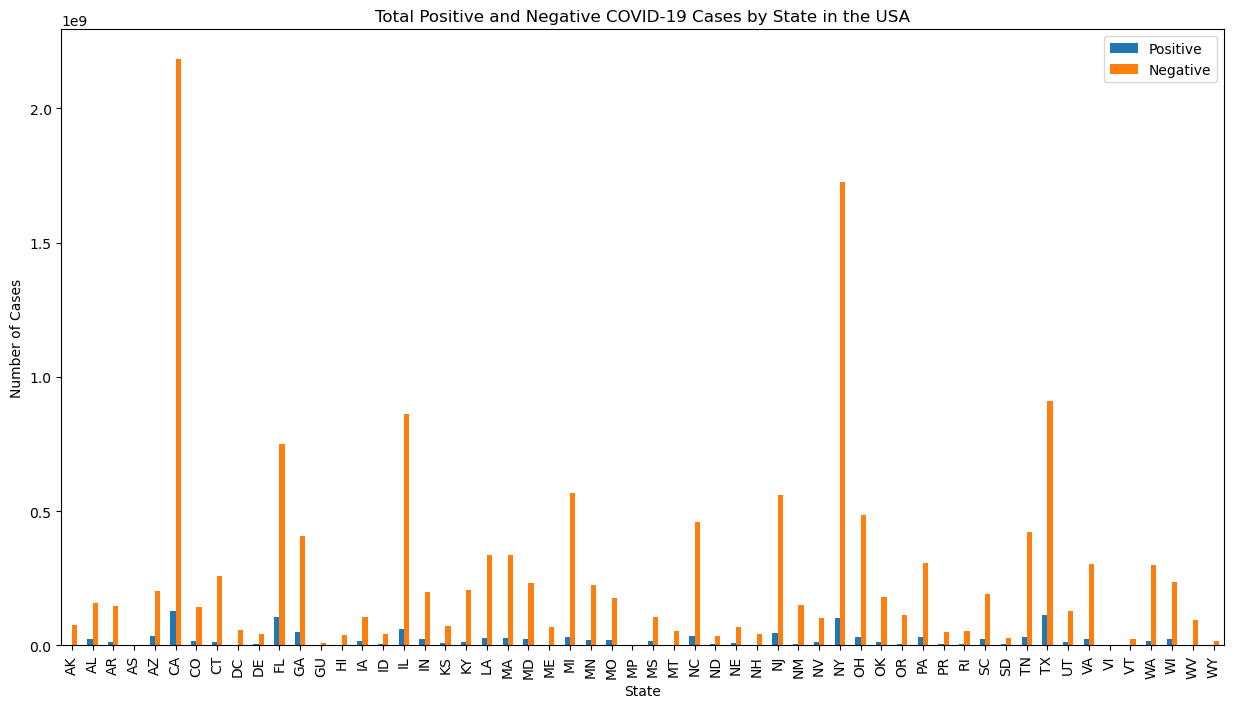

In [22]:
# Group the data by state and sum the positive and negative cases
grouped_data = covid_us_states.groupby("State").sum()

# Create a bar chart of the positive and negative cases by state
grouped_data[["Positive", "Negative"]].plot(kind="bar", figsize=(15,8))
plt.xlabel("State")
plt.ylabel("Number of Cases")
plt.title("Total Positive and Negative COVID-19 Cases by State in the USA")
plt.legend(["Positive", "Negative"])
plt.show()

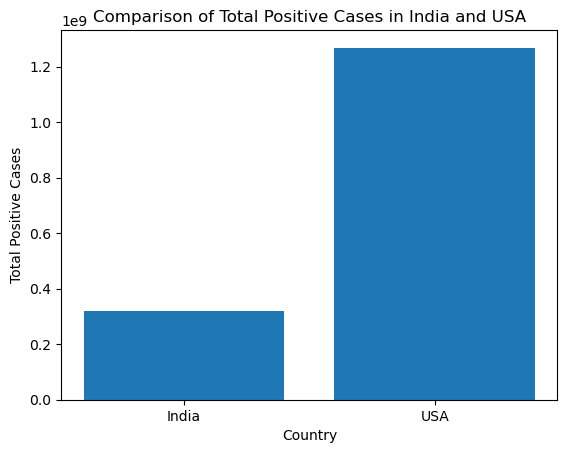

In [23]:
# Compute the total number of positive cases in each country
total_positive_india = tests_india["Positive"].sum()
total_positive_usa = covid_us_states["Positive"].sum()

# Create a bar graph
plt.bar(["India", "USA"], [total_positive_india, total_positive_usa])

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Total Positive Cases")
plt.title("Comparison of Total Positive Cases in India and USA")

# Show the plot
plt.show()


In [7]:
covid_world.info()
print(covid_world.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB
Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64


In [17]:
covid_world["Total Deaths"] = covid_world["Total Deaths"].fillna(0)
covid_world["Total Recovered"] = covid_world["Total Recovered"].fillna(0)
covid_world["Active Cases"] = covid_world["Active Cases"].fillna(0)
covid_world["Total Test"] = covid_world["Total Test"].fillna(0)
covid_world["Population"] = covid_world["Population"].fillna(0)
print(covid_world.isnull().sum())

Serial Number      0
Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64


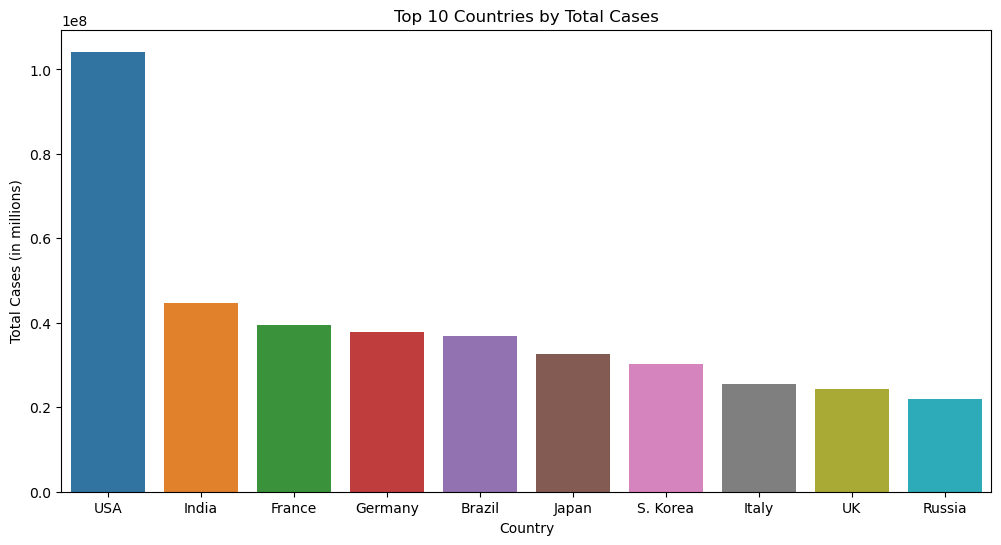

In [14]:
# Visualize the total cases by country using a bar chart
top_10_countries = covid_world.sort_values('Total Cases', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total Cases', data=top_10_countries)
plt.title('Top 10 Countries by Total Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases (in millions)')
plt.show()


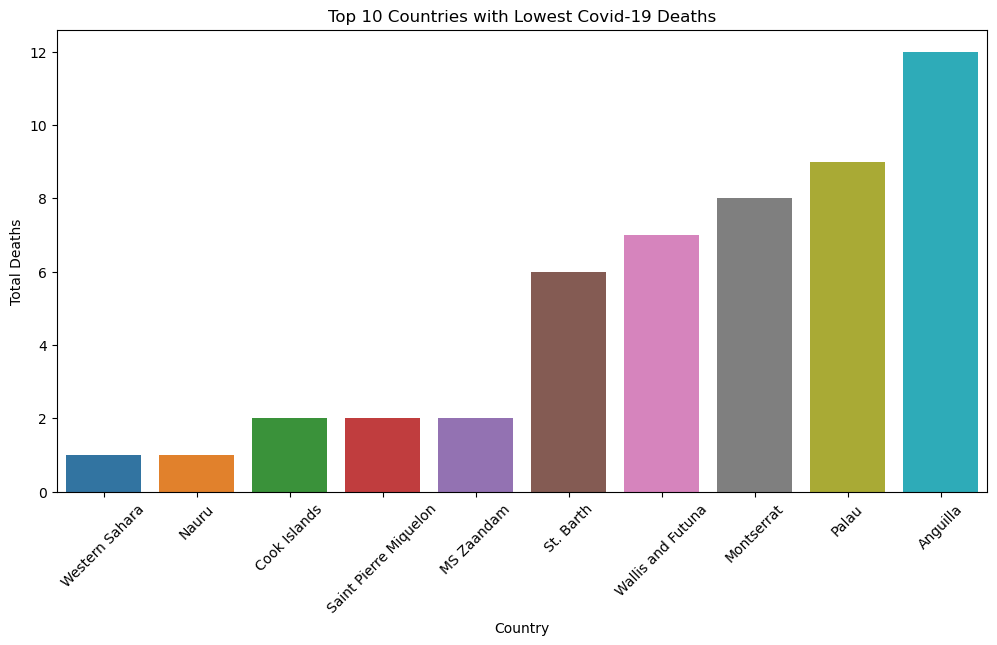

In [24]:
n = 10  # number of countries to visualize
lowest_deaths = covid_world.sort_values('Total Deaths').head(n)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total Deaths', data=lowest_deaths)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title(f'Top {n} Countries with Lowest Covid-19 Deaths')
plt.show()


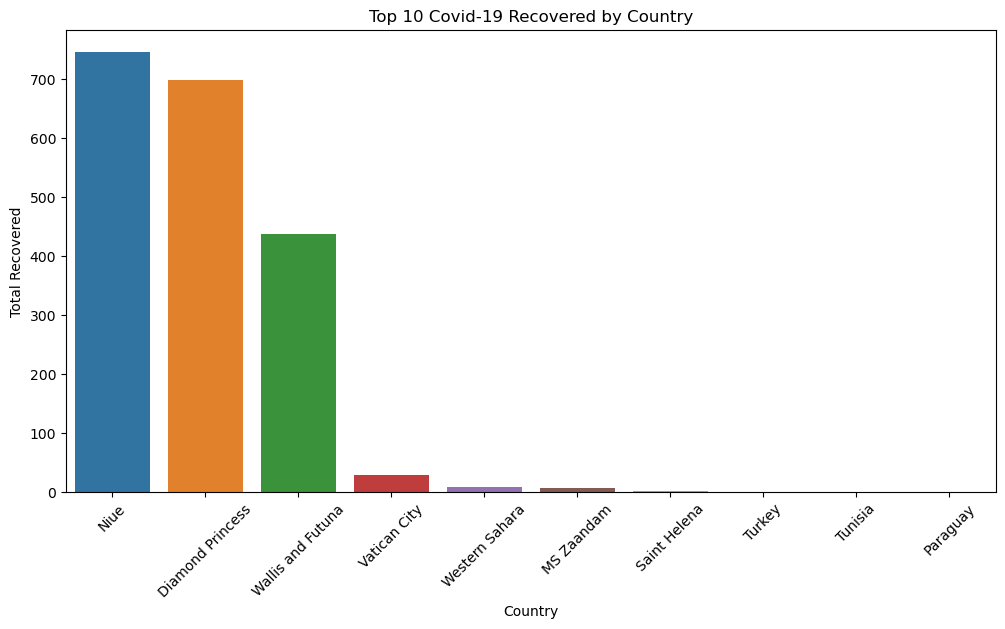

In [27]:
# The top 10 countires recovered from Covid using a bar chart
covid_world['Total Recovered'] = pd.to_numeric(covid_world['Total Recovered'], errors='coerce')
plt.figure(figsize=(12, 6))
top_recovered = covid_world.nlargest(10, 'Total Recovered')
sns.barplot(x='Country', y='Total Recovered', data=top_recovered)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Recovered')
plt.title('Top 10 Covid-19 Recovered by Country')
plt.show()

In [43]:
import plotly.express as px
fig = px.choropleth(covid_world, locations='Country', locationmode='country names',scope='world',color='Total Deaths', color_continuous_scale= 'Viridis_r')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0}, coloraxis_colorbar=dict(
    title = 'Total Deaths',
    ticks = 'outside',
    tickvals = [0,200000,400000,600000,800000, 1000000],
    dtick = 5
))
fig.show()